In [1]:
from utils import *
from sklearn import metrics
from sklearn.datasets import make_friedman1, make_friedman2, make_friedman3
import pandas as pd

In [2]:
datasets = []
datasets_std = []

In [3]:
name = 'Friedman 1'
noise = 1.5

X_train, y_train = make_friedman1(noise=0.0, random_state=18397425)
_, y_train_noisy = make_friedman1(noise=noise, random_state=18397425)
X_norm_train= normalize(X_train, axis=1)

X_test, y_test = make_friedman1(noise=0.0, random_state=30189745)
_, y_test_noisy = make_friedman1(noise=noise, random_state=30189745)
X_norm_test= normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, noise, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, noise, name])

for i in range(0, X_train.shape[1]):
    X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / np.std(X_train[:,i])
    X_test[:,i] = (X_test[:,i] - np.mean(X_train[:,i])) / np.std(X_train[:,i])

X_norm_train = normalize(X_train, axis=1)
X_norm_test = normalize(X_test, axis=1)

datasets_std.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name + ' Std'])
datasets_std.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, noise, name + ' Std'])
datasets_std.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name + ' Std'])
datasets_std.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, noise, name + ' Std'])

In [4]:
name = 'Friedman 2'
noise = 5

X_train, y_train = make_friedman2(noise=0.0, random_state=18397425)
_, y_train_noisy = make_friedman2(noise=noise, random_state=18397425)
X_norm_train= normalize(X_train, axis=1)

X_test, y_test = make_friedman2(noise=0.0, random_state=30189745)
_, y_test_noisy = make_friedman2(noise=noise, random_state=30189745)
X_norm_test= normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, noise, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, noise, name])

for i in range(0, X_train.shape[1]):
    X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / np.std(X_train[:,i])
    X_test[:,i] = (X_test[:,i] - np.mean(X_train[:,i])) / np.std(X_train[:,i])

X_norm_train = normalize(X_train, axis=1)
X_norm_test = normalize(X_test, axis=1)

datasets_std.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name + ' Std'])
datasets_std.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, noise, name + ' Std'])
datasets_std.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name + ' Std'])
datasets_std.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, noise, name + ' Std'])

In [5]:
name = 'Friedman 3'
noise = 0.15

X_train, y_train = make_friedman3(noise=0.0, random_state=18397425)
_, y_train_noisy = make_friedman3(noise=noise, random_state=18397425)
X_norm_train= normalize(X_train, axis=1)

X_test, y_test = make_friedman3(noise=0.0, random_state=30189745)
_, y_test_noisy = make_friedman3(noise=noise, random_state=30189745)
X_norm_test= normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, noise, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, noise, name])

for i in range(0, X_train.shape[1]):
    X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / np.std(X_train[:,i])
    X_test[:,i] = (X_test[:,i] - np.mean(X_train[:,i])) / np.std(X_train[:,i])

X_norm_train = normalize(X_train, axis=1)
X_norm_test = normalize(X_test, axis=1)

datasets_std.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name + ' Std'])
datasets_std.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, noise, name + ' Std'])
datasets_std.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name + ' Std'])
datasets_std.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, noise, name + ' Std'])

In [6]:
%%capture
depths = (2, 3, 10)
experiment_output = []
for dataset in datasets:
    for depth in depths:
        experiment_output.append(experiment(dataset, depth=depth, log=True))

In [7]:
%%capture
depths = (2, 3, 10)
experiment_output_std = []
for dataset in datasets_std:
    for depth in depths:
        experiment_output_std.append(experiment(dataset, depth=depth, log=True))

In [8]:
all_outputs = {}
all_outputs['norm_y'] = experiment_output
all_outputs['norm_y_rescale'] = experiment_output_std

In [9]:
%%capture
depths = (2, 3, 10)
experiment_output = []
for dataset in datasets:
    for depth in depths:
        experiment_output.append(experiment(dataset, depth=depth, log=True, norm_y=False))

In [10]:
%%capture
depths = (2, 3, 10)
experiment_output_std = []
for dataset in datasets_std:
    for depth in depths:
        experiment_output_std.append(experiment(dataset, depth=depth, log=True, norm_y=False))

In [11]:
all_outputs['none'] = experiment_output
all_outputs['rescale'] = experiment_output_std

In [12]:
print(all_outputs.keys())

dict_keys(['norm_y', 'norm_y_rescale', 'none', 'rescale'])


In [13]:
# save_data(all_outputs, 'exp_norm_test')

In [14]:
all_outputs = load_data('./exp_norm_test')

In [69]:
depths=(2,3,10)
arrays = [
    ['Friedman 1', 'Friedman 1 Std', 'Friedman 2', 'Friedman 2 Std', 'Friedman 3', 'Friedman 3 Std'],
    [False, True],  # Noise
]

index = pd.MultiIndex.from_product(
    arrays, names=["Dataset", "Noise"])


df_gaus_sd = pd.DataFrame(
    index=index,
    columns=['D2rmse', 'D3rmse',  'D10rmse', 'D2r', 'D3r',  'D10r', 'D2corr', 'D3corr', 'D10corr'])

# df_lap_sd = pd.DataFrame(
#     index=index,
#     columns=['D2rmse', 'D3rmse',  'D10rmse', 'D2r', 'D3r',  'D10r', 'D2corr', 'D3corr', 'D10corr'])

df_lap_sd = df_gaus_sd.copy(deep=True)

df_gaus_sd_norm_y = df_gaus_sd.copy(deep=True)
df_lap_sd_norm_y = df_gaus_sd.copy(deep=True)

df_gaus_rd = df_gaus_sd.copy(deep=True)
df_lap_rd = df_gaus_sd.copy(deep=True)

df_gaus_rd_norm_y = df_gaus_sd.copy(deep=True)
df_lap_rd_norm_y = df_gaus_sd.copy(deep=True)

df_ntk_sd = df_gaus_sd.copy(deep=True)
df_ntk_sd_norm_y = df_gaus_sd.copy(deep=True)

df_ntk_rd = df_gaus_sd.copy(deep=True)
df_ntk_rd_norm_y = df_gaus_sd.copy(deep=True)

In [70]:
experiment_output = all_outputs['none']

for exp in experiment_output:
    depth = exp['kernel']['depth']
    name = exp['dataset']['name']
    noise = exp['dataset']['noise']

    if noise==0.0: 
        noisy = False 
    else: 
        noisy = True

    if exp['dataset']['norm']:
        df_ntk_sd[f'D{depth}rmse'][name, noisy]  = exp['ntk']['data_rmse']
        df_ntk_sd[f'D{depth}r'][name, noisy] = exp['ntk']['r2']
        df_ntk_sd[f'D{depth}corr'][name, noisy]  = exp['ntk']['data_corr']
    else:
        df_ntk_rd[f'D{depth}rmse'][name, noisy]  = exp['ntk']['data_rmse']
        df_ntk_rd[f'D{depth}r'][name, noisy] = exp['ntk']['r2']
        df_ntk_rd[f'D{depth}corr'][name, noisy]  = exp['ntk']['data_corr']

experiment_output = all_outputs['rescale']

for exp in experiment_output:
    depth = exp['kernel']['depth']
    name = exp['dataset']['name']
    noise = exp['dataset']['noise']

    if noise==0.0: 
        noisy = False 
    else: 
        noisy = True

    if exp['dataset']['norm']:
        df_ntk_sd[f'D{depth}rmse'][name, noisy]  = exp['ntk']['data_rmse']
        df_ntk_sd[f'D{depth}r'][name, noisy] = exp['ntk']['r2']
        df_ntk_sd[f'D{depth}corr'][name, noisy]  = exp['ntk']['data_corr']
    else:
        df_ntk_rd[f'D{depth}rmse'][name, noisy]  = exp['ntk']['data_rmse']
        df_ntk_rd[f'D{depth}r'][name, noisy] = exp['ntk']['r2']
        df_ntk_rd[f'D{depth}corr'][name, noisy]  = exp['ntk']['data_corr']

In [71]:
experiment_output = all_outputs['norm_y']

for exp in experiment_output:
    depth = exp['kernel']['depth']
    name = exp['dataset']['name']
    noise = exp['dataset']['noise']

    if noise==0.0: 
        noisy = False 
    else: 
        noisy = True

    if exp['dataset']['norm']:
        df_ntk_sd_norm_y[f'D{depth}rmse'][name, noisy]  = exp['ntk']['data_rmse']
        df_ntk_sd_norm_y[f'D{depth}r'][name, noisy] = exp['ntk']['r2']
        df_ntk_sd_norm_y[f'D{depth}corr'][name, noisy]  = exp['ntk']['data_corr']
    else:
        df_ntk_rd_norm_y[f'D{depth}rmse'][name, noisy]  = exp['ntk']['data_rmse']
        df_ntk_rd_norm_y[f'D{depth}r'][name, noisy] = exp['ntk']['r2']
        df_ntk_rd_norm_y[f'D{depth}corr'][name, noisy]  = exp['ntk']['data_corr']

experiment_output = all_outputs['norm_y_rescale']

for exp in experiment_output:
    depth = exp['kernel']['depth']
    name = exp['dataset']['name']
    noise = exp['dataset']['noise']

    if noise==0.0: 
        noisy = False 
    else: 
        noisy = True

    if exp['dataset']['norm']:
        df_ntk_sd_norm_y[f'D{depth}rmse'][name, noisy]  = exp['ntk']['data_rmse']
        df_ntk_sd_norm_y[f'D{depth}r'][name, noisy] = exp['ntk']['r2']
        df_ntk_sd_norm_y[f'D{depth}corr'][name, noisy]  = exp['ntk']['data_corr']
    else:
        df_ntk_rd_norm_y[f'D{depth}rmse'][name, noisy]  = exp['ntk']['data_rmse']
        df_ntk_rd_norm_y[f'D{depth}r'][name, noisy] = exp['ntk']['r2']
        df_ntk_rd_norm_y[f'D{depth}corr'][name, noisy]  = exp['ntk']['data_corr']

In [72]:
experiment_output = all_outputs['none']

for exp in experiment_output:
    depth = exp['kernel']['depth']
    name = exp['dataset']['name']
    noise = exp['dataset']['noise']

    if noise==0.0: 
        noisy = False 
    else: 
        noisy = True

    if exp['dataset']['norm']:
        df_lap_sd[f'D{depth}rmse'][name, noisy]  = exp['lap']['pred_rmse']
        df_lap_sd[f'D{depth}r'][name, noisy] = exp['lap']['r2']
        df_lap_sd[f'D{depth}corr'][name, noisy]  = exp['lap']['pred_corr']
        df_gaus_sd[f'D{depth}rmse'][name, noisy] = exp['gaus']['pred_rmse']
        df_gaus_sd[f'D{depth}r'][name, noisy] = exp['gaus']['r2']
        df_gaus_sd[f'D{depth}corr'][name, noisy] = exp['gaus']['pred_corr']
    else:
        df_lap_rd[f'D{depth}rmse'][name, noisy]  = exp['lap']['pred_rmse']
        df_lap_rd[f'D{depth}r'][name, noisy] = exp['lap']['r2']
        df_lap_rd[f'D{depth}corr'][name, noisy]  = exp['lap']['pred_corr']
        df_gaus_rd[f'D{depth}rmse'][name, noisy] = exp['gaus']['pred_rmse']
        df_gaus_rd[f'D{depth}r'][name, noisy] = exp['gaus']['r2']
        df_gaus_rd[f'D{depth}corr'][name, noisy] = exp['gaus']['pred_corr']

experiment_output = all_outputs['rescale']

for exp in experiment_output:
    depth = exp['kernel']['depth']
    name = exp['dataset']['name']
    noise = exp['dataset']['noise']

    if noise==0.0: 
        noisy = False 
    else: 
        noisy = True

    if exp['dataset']['norm']:
        df_lap_sd[f'D{depth}rmse'][name, noisy]  = exp['lap']['pred_rmse']
        df_lap_sd[f'D{depth}r'][name, noisy] = exp['lap']['r2']
        df_lap_sd[f'D{depth}corr'][name, noisy]  = exp['lap']['pred_corr']
        df_gaus_sd[f'D{depth}rmse'][name, noisy] = exp['gaus']['pred_rmse']
        df_gaus_sd[f'D{depth}r'][name, noisy] = exp['gaus']['r2']
        df_gaus_sd[f'D{depth}corr'][name, noisy] = exp['gaus']['pred_corr']
    else:
        df_lap_rd[f'D{depth}rmse'][name, noisy]  = exp['lap']['pred_rmse']
        df_lap_rd[f'D{depth}r'][name, noisy] = exp['lap']['r2']
        df_lap_rd[f'D{depth}corr'][name, noisy]  = exp['lap']['pred_corr']
        df_gaus_rd[f'D{depth}rmse'][name, noisy] = exp['gaus']['pred_rmse']
        df_gaus_rd[f'D{depth}r'][name, noisy] = exp['gaus']['r2']
        df_gaus_rd[f'D{depth}corr'][name, noisy] = exp['gaus']['pred_corr']

In [73]:
experiment_output = all_outputs['norm_y']

for exp in experiment_output:
    depth = exp['kernel']['depth']
    name = exp['dataset']['name']
    noise = exp['dataset']['noise']

    if noise==0.0: 
        noisy = False 
    else: 
        noisy = True

    if exp['dataset']['norm']:
        df_lap_sd_norm_y[f'D{depth}rmse'][name, noisy]  = exp['lap']['pred_rmse']
        df_lap_sd_norm_y[f'D{depth}r'][name, noisy] = exp['lap']['r2']
        df_lap_sd_norm_y[f'D{depth}corr'][name, noisy]  = exp['lap']['pred_corr']
        df_gaus_sd_norm_y[f'D{depth}rmse'][name, noisy] = exp['gaus']['pred_rmse']
        df_gaus_sd_norm_y[f'D{depth}r'][name, noisy] = exp['gaus']['r2']
        df_gaus_sd_norm_y[f'D{depth}corr'][name, noisy] = exp['gaus']['pred_corr']
    else:
        df_lap_rd_norm_y[f'D{depth}rmse'][name, noisy]  = exp['lap']['pred_rmse']
        df_lap_rd_norm_y[f'D{depth}r'][name, noisy] = exp['lap']['r2']
        df_lap_rd_norm_y[f'D{depth}corr'][name, noisy]  = exp['lap']['pred_corr']
        df_gaus_rd_norm_y[f'D{depth}rmse'][name, noisy] = exp['gaus']['pred_rmse']
        df_gaus_rd_norm_y[f'D{depth}r'][name, noisy] = exp['gaus']['r2']
        df_gaus_rd_norm_y[f'D{depth}corr'][name, noisy] = exp['gaus']['pred_corr']

experiment_output = all_outputs['norm_y_rescale']

for exp in experiment_output:
    depth = exp['kernel']['depth']
    name = exp['dataset']['name']
    noise = exp['dataset']['noise']

    if noise==0.0: 
        noisy = False 
    else: 
        noisy = True

    if exp['dataset']['norm']:
        df_lap_sd_norm_y[f'D{depth}rmse'][name, noisy]  = exp['lap']['pred_rmse']
        df_lap_sd_norm_y[f'D{depth}r'][name, noisy] = exp['lap']['r2']
        df_lap_sd_norm_y[f'D{depth}corr'][name, noisy]  = exp['lap']['pred_corr']
        df_gaus_sd_norm_y[f'D{depth}rmse'][name, noisy] = exp['gaus']['pred_rmse']
        df_gaus_sd_norm_y[f'D{depth}r'][name, noisy] = exp['gaus']['r2']
        df_gaus_sd_norm_y[f'D{depth}corr'][name, noisy] = exp['gaus']['pred_corr']
    else:
        df_lap_rd_norm_y[f'D{depth}rmse'][name, noisy]  = exp['lap']['pred_rmse']
        df_lap_rd_norm_y[f'D{depth}r'][name, noisy] = exp['lap']['r2']
        df_lap_rd_norm_y[f'D{depth}corr'][name, noisy]  = exp['lap']['pred_corr']
        df_gaus_rd_norm_y[f'D{depth}rmse'][name, noisy] = exp['gaus']['pred_rmse']
        df_gaus_rd_norm_y[f'D{depth}r'][name, noisy] = exp['gaus']['r2']
        df_gaus_rd_norm_y[f'D{depth}corr'][name, noisy] = exp['gaus']['pred_corr']

In [74]:
df_ntk_sd

D2rmse      D3rmse     D10rmse       D2r       D3r  \
Dataset        Noise                                                           
Friedman 1     False    3.053503    3.083053    3.305223  0.654859  0.648147   
               True     3.515408    3.513361    3.676093  0.591945   0.59242   
Friedman 1 Std False    8.323547    7.829316    5.939072 -1.564581 -1.269066   
               True     8.004236    7.600599    6.030748 -1.115471 -0.907493   
Friedman 2     False  426.421523  426.612048  427.118452   -0.0688 -0.069755   
               True   384.117369  383.964326  385.869937   0.13625  0.136938   
Friedman 2 Std False  487.375364  483.959521  457.523539 -0.396193  -0.37669   
               True   490.607083  486.064595  458.110492 -0.409054 -0.383082   
Friedman 3     False     0.24107    0.241278    0.242383  -0.19803   -0.2001   
               True     0.256197    0.256002     0.26141  0.062949  0.064375   
Friedman 3 Std False    0.247577    0.243942    0.231397 -0.263575  -0.22674   
               True     0.281064    0.276976    0.264307 -0.127785 -0.095215   

                          D10r    D2corr    D3corr   D10corr  
Dataset        Noise                                          
Friedman 1     False  0.595609  0.809457  0.805592  0.782017  
               True   0.553789  0.771826  0.771411  0.751887  
Friedman 1 Std False  -0.30568  0.726612  0.716501  0.676303  
               True  -0.200908  0.744744  0.738704  0.704765  
Friedman 2     False -0.072296   0.23437  0.233479  0.231218  
               True    0.12835  0.429753  0.423029  0.393539  
Friedman 2 Std False -0.230397  0.413476  0.408831  0.050758  
               True  -0.228572  0.408095  0.410127  0.189766  
Friedman 3     False -0.211114   0.41896  0.418071  0.413221  
               True   0.024426  0.482463  0.483181  0.463155  
Friedman 3 Std False -0.103818 -0.648093 -0.647716 -0.653109  
               True   0.002689  0.634096  0.635437  0.633197

In [75]:
df_ntk_sd_norm_y

D2rmse      D3rmse     D10rmse       D2r       D3r  \
Dataset        Noise                                                           
Friedman 1     False    3.098101     3.13887    3.374442  0.644704  0.635291   
               True     3.548121    3.557875    3.730027  0.584315  0.582027   
Friedman 1 Std False    8.641746    8.165398    6.194285  -1.76441 -1.468052   
               True     8.078471     7.74391    6.223272 -1.154892 -0.980103   
Friedman 2     False  426.830806  426.878934  427.179795 -0.070853 -0.071094   
               True   386.368478  386.208014  385.814425  0.126096  0.126822   
Friedman 2 Std False  489.780179  486.838718   461.44685 -0.410005  -0.39312   
               True   494.208129  488.943183  462.016595 -0.429815 -0.399513   
Friedman 3     False    0.241078    0.241281    0.242319 -0.198105 -0.200121   
               True     0.254549    0.255817    0.260758  0.074964   0.06573   
Friedman 3 Std False    0.249052    0.246335    0.236459 -0.278676  -0.25093   
               True     0.285653    0.280625    0.267138 -0.164908 -0.124259   

                          D10r    D2corr    D3corr   D10corr  
Dataset        Noise                                          
Friedman 1     False  0.578494  0.803434  0.798136   0.77232  
               True     0.5406  0.766492   0.76449  0.743339  
Friedman 1 Std False -0.420306  0.703818  0.706537  0.678755  
               True  -0.278807  0.741171  0.741643  0.710646  
Friedman 2     False -0.072604   0.23249  0.232273  0.230944  
               True   0.128601  0.437207   0.43601  0.430951  
Friedman 2 Std False -0.251589  0.413409   0.40982   0.29479  
               True  -0.249612  0.405322  0.407961  0.342167  
Friedman 3     False -0.210474   0.41898  0.418108  0.413313  
               True   0.029291  0.488964  0.484079  0.464999  
Friedman 3 Std False -0.152641 -0.642867 -0.640219 -0.644103  
               True  -0.018791  0.634667  0.637362  0.632579

In [76]:
df_ntk_rd

D2rmse         D3rmse        D10rmse            D2r  \
Dataset        Noise                                                            
Friedman 1     False    6.245068       6.361248        5.19497       -0.44369   
               True     6.046664       6.078972       5.135057      -0.207255   
Friedman 1 Std False    6.245068       6.361248        5.19497       -0.44369   
               True     6.046664       6.078972       5.135057      -0.207255   
Friedman 2     False   492.04035  236801.542625     455.977685      -0.423048   
               True    493.35638  239225.125166  196782.200209      -0.424891   
Friedman 2 Std False   492.04035  236801.542625     455.977685      -0.423048   
               True    493.35638  239225.125166  196782.200209      -0.424891   
Friedman 3     False   26.793687      23.618989        2.75366   -14798.44832   
               True   111.465501      93.109976      56.694613 -177375.158712   
Friedman 3 Std False   26.793687      23.618989        2.75366   -14798.44832   
               True   111.465501      93.109976      56.694613 -177375.158712   

                                D3r           D10r    D2corr    D3corr  \
Dataset        Noise                                                     
Friedman 1     False      -0.497905          0.001  0.825023   0.80093   
               True        -0.22019       0.129322  0.820967  0.809961   
Friedman 1 Std False      -0.497905          0.001  0.825023   0.80093   
               True        -0.22019       0.129322  0.820967  0.809961   
Friedman 2     False -329599.041879      -0.222096  0.402773  0.639759   
               True  -335021.278478 -226688.670452  0.402478  0.640253   
Friedman 2 Std False -329599.041879      -0.222096  0.402773  0.639759   
               True  -335021.278478 -226688.670452  0.402478  0.640253   
Friedman 3     False  -11499.141507    -155.315218  0.499361  0.489061   
               True  -123766.533623  -45886.869069  0.503159  0.502316   
Friedman 3 Std False  -11499.141507    -155.315218  0.499361  0.489061   
               True  -123766.533623  -45886.869069  0.503159  0.502316   

                       D10corr  
Dataset        Noise            
Friedman 1     False  0.768435  
               True   0.794734  
Friedman 1 Std False  0.768435  
               True   0.794734  
Friedman 2     False  0.068488  
               True   0.640288  
Friedman 2 Std False  0.068488  
               True   0.640288  
Friedman 3     False -0.466009  
               True   0.489899  
Friedman 3 Std False -0.466009  
               True   0.489899

In [77]:
df_ntk_rd_norm_y

D2rmse         D3rmse        D10rmse  \
Dataset        Noise                                                
Friedman 1     False       5.910543       5.727827       5.076565   
               True        5.777626       5.677645       5.269707   
Friedman 1 Std False       5.910543       5.727827       5.076565   
               True        5.777626       5.677645       5.269707   
Friedman 2     False  237150.464367  231366.083818  182554.924244   
               True   241022.938571  234226.489201   183527.88648   
Friedman 2 Std False  237150.464367  231366.083818  182554.924244   
               True   241022.938571  234226.489201   183527.88648   
Friedman 3     False       8.763549      22.923852      19.326551   
               True       54.699511      53.773852      31.837821   
Friedman 3 Std False       8.763549      22.923852      19.326551   
               True       54.699511      53.773852      31.837821   

                                D2r            D3r           D10r    D2corr  \
Dataset        Noise                                                          
Friedman 1     False      -0.293166      -0.214449        0.04602  0.832482   
               True       -0.102214      -0.064397       0.083062  0.817855   
Friedman 1 Std False      -0.293166      -0.214449        0.04602  0.832482   
               True       -0.102214      -0.064397       0.083062  0.817855   
Friedman 2     False -330571.073969 -314641.652773 -195885.861478  0.639822   
               True  -340075.687036 -321166.894556 -197179.622569  0.640316   
Friedman 2 Std False -330571.073969 -314641.652773 -195885.861478  0.639822   
               True  -340075.687036 -321166.894556 -197179.622569  0.640316   
Friedman 3     False   -1582.217431  -10832.175242    -7698.97458 -0.345043   
               True   -42714.076804   -41280.60788  -14470.081354  0.509007   
Friedman 3 Std False   -1582.217431  -10832.175242    -7698.97458 -0.345043   
               True   -42714.076804   -41280.60788  -14470.081354  0.509007   

                        D3corr   D10corr  
Dataset        Noise                      
Friedman 1     False  0.833024  0.822231  
               True   0.819116  0.807047  
Friedman 1 Std False  0.833024  0.822231  
               True   0.819116  0.807047  
Friedman 2     False  0.639873  0.640188  
               True   0.640365  0.640671  
Friedman 2 Std False  0.639873  0.640188  
               True   0.640365  0.640671  
Friedman 3     False  -0.44647  -0.47124  
               True   0.508122   0.51303  
Friedman 3 Std False  -0.44647  -0.47124  
               True   0.508122   0.51303

In [79]:
df_lap_sd

D2rmse    D3rmse   D10rmse       D2r       D3r  \
Dataset        Noise                                                     
Friedman 1     False  0.369145  0.288527  0.354485  0.639155  0.637018   
               True   0.352764  0.319358  0.369319  0.572927   0.57831   
Friedman 1 Std False  0.027102  0.024974  0.218672 -1.565682 -1.265459   
               True   0.128483  0.072482  0.210674 -1.122017 -0.908318   
Friedman 2     False  1.912787  0.846103  0.037873 -0.070587 -0.070594   
               True   1.742755  1.062736  0.531244  0.134191  0.135752   
Friedman 2 Std False  0.769557  0.646578  0.821099 -0.394722 -0.375412   
               True    0.28918  0.470784  0.791099 -0.408611 -0.382177   
Friedman 3     False  0.000009  0.000036  0.000379 -0.198036 -0.200114   
               True    0.00042  0.000536  0.000332  0.062216  0.063351   
Friedman 3 Std False  0.000692  0.000141  0.001685 -0.259021 -0.225822   
               True   0.000191  0.001094  0.000327 -0.127168 -0.100345   

                          D10r    D2corr    D3corr   D10corr  
Dataset        Noise                                          
Friedman 1     False  0.622037  0.997359  0.998318  0.998521  
               True   0.573489  0.998484  0.998818  0.998443  
Friedman 1 Std False -0.271805  0.999864  0.999899  0.996286  
               True  -0.167456  0.996732  0.998768  0.996685  
Friedman 2     False -0.072268  0.999966  0.999993       1.0  
               True    0.12877  0.999923  0.999973  0.999995  
Friedman 2 Std False  -0.23213  0.999343  0.999341  0.797503  
               True   -0.23023  0.999869  0.999826  0.772855  
Friedman 3     False  -0.21095       1.0       1.0  0.999999  
               True    0.02495  0.999998  0.999997  0.999999  
Friedman 3 Std False -0.114681  0.997137  0.999804  0.999013  
               True   0.003625   0.99993  0.999285  0.998697

In [80]:
df_lap_sd_norm_y

D2rmse    D3rmse   D10rmse       D2r       D3r  \
Dataset        Noise                                                     
Friedman 1     False  0.287552  0.192716  0.149625  0.638026  0.633121   
               True   0.204771  0.232242  0.153441   0.57334    0.5733   
Friedman 1 Std False   0.33471  0.178345  0.023995  -1.72792 -1.461315   
               True   0.300469  0.160416   0.02381  -1.16937 -0.989119   
Friedman 2     False  0.005028  0.017825  0.187499 -0.070847 -0.071085   
               True   2.544898  1.659793  1.133928  0.123886  0.125374   
Friedman 2 Std False   0.67075  0.584711  0.234844 -0.408773 -0.391997   
               True   0.176888  0.292721  0.218505 -0.429743  -0.39901   
Friedman 3     False  0.000007  0.000022  0.000261 -0.198111 -0.200119   
               True   0.000989  0.000618  0.000469  0.073449  0.064865   
Friedman 3 Std False  0.000684  0.000276  0.000529 -0.274197 -0.249171   
               True   0.021123  0.007095  0.000543 -0.097037 -0.102039   

                          D10r    D2corr    D3corr   D10corr  
Dataset        Noise                                          
Friedman 1     False  0.574724  0.998107  0.999072  0.999192  
               True   0.536773  0.999493  0.999231   0.99926  
Friedman 1 Std False -0.419638  0.979201  0.993115  0.999781  
               True  -0.276821  0.983033  0.994387  0.999794  
Friedman 2     False  -0.07253       1.0       1.0       1.0  
               True   0.129723  0.999781  0.999911  0.999967  
Friedman 2 Std False -0.252053  0.999611  0.999692  0.989786  
               True  -0.250037  0.999829  0.999918  0.996008  
Friedman 3     False -0.209886       1.0       1.0  0.999999  
               True   0.029618  0.999988  0.999996  0.999998  
Friedman 3 Std False -0.156018  0.995859  0.999614  0.999224  
               True  -0.016211  0.999918  0.999293  0.999978

In [81]:
df_lap_rd

D2rmse         D3rmse        D10rmse       D2r  \
Dataset        Noise                                                       
Friedman 1     False    0.310843       0.429618       1.867202 -0.457136   
               True     0.323977       0.408051       1.922903 -0.240275   
Friedman 1 Std False    0.310843       0.429618       1.867202 -0.457136   
               True     0.323977       0.408051       1.922903 -0.240275   
Friedman 2     False   98.433619  236432.202013     120.027831 -0.866949   
               True   196.693918  238859.751705  196409.288647 -0.202381   
Friedman 2 Std False   98.433619  236432.202013     120.027831 -0.866949   
               True   196.693918  238859.751705  196409.288647 -0.202381   
Friedman 3     False    26.81511      23.635746       1.546771  0.088713   
               True   111.587977      93.275739      56.755206  -0.09274   
Friedman 3 Std False    26.81511      23.635746       1.546771  0.088713   
               True   111.587977      93.275739      56.755206  -0.09274   

                           D3r       D10r    D2corr    D3corr   D10corr  
Dataset        Noise                                                     
Friedman 1     False -0.457805  -0.555661  0.980144  0.957862  0.010327  
               True  -0.240242  -0.365736  0.980824  0.969279 -0.129406  
Friedman 1 Std False -0.457805  -0.555661  0.980144  0.957862  0.010327  
               True  -0.240242  -0.365736  0.980824  0.969279 -0.129406  
Friedman 2     False  -1.59783  -0.742277 -0.611762 -0.863939  0.192174  
               True  -1.567442  -1.613125 -0.612735 -0.841933 -0.837213  
Friedman 2 Std False  -1.59783  -0.742277 -0.611762 -0.863939  0.192174  
               True  -1.567442  -1.613125 -0.612735 -0.841933 -0.837213  
Friedman 3     False  0.082927 -36.680311  0.506122  0.483154  0.757965  
               True  -0.215014   0.019209 -0.861792 -0.971362  -0.31547  
Friedman 3 Std False  0.082927 -36.680311  0.506122  0.483154  0.757965  
               True  -0.215014   0.019209 -0.861792 -0.971362  -0.31547

In [82]:
df_lap_rd_norm_y

D2rmse         D3rmse        D10rmse       D2r  \
Dataset        Noise                                                          
Friedman 1     False       0.331602       0.296992       0.354676  -0.29797   
               True        0.347588       0.283673       0.171291 -0.127093   
Friedman 1 Std False       0.331602       0.296992       0.354676  -0.29797   
               True        0.347588       0.283673       0.171291 -0.127093   
Friedman 2     False   236869.93795  231086.311314  182266.121543 -1.113387   
               True   240866.516926   234071.37717   183354.31227  -0.61748   
Friedman 2 Std False   236869.93795  231086.311314  182266.121543 -1.113387   
               True   240866.516926   234071.37717   183354.31227  -0.61748   
Friedman 3     False       8.670661      22.821787      19.220615  -0.09619   
               True       54.857601      53.932047      31.991347  -0.17828   
Friedman 3 Std False       8.670661      22.821787      19.220615  -0.09619   
               True       54.857601      53.932047      31.991347  -0.17828   

                           D3r      D10r    D2corr    D3corr   D10corr  
Dataset        Noise                                                    
Friedman 1     False -0.218406 -0.007634   0.96914  0.971537  0.899889  
               True  -0.086199  0.069024  0.965117  0.973504  0.977989  
Friedman 1 Std False -0.218406 -0.007634   0.96914  0.971537  0.899889  
               True  -0.086199  0.069024  0.965117  0.973504  0.977989  
Friedman 2     False -1.110094 -1.149465 -0.988174 -0.988364 -0.986208  
               True  -0.613227 -0.673077 -0.998175 -0.998194 -0.997925  
Friedman 2 Std False -1.110094 -1.149465 -0.988174 -0.988364 -0.986208  
               True  -0.613227 -0.673077 -0.998175 -0.998194 -0.997925  
Friedman 3     False -0.096307 -0.096369 -0.061215 -0.110118 -0.134473  
               True   -0.17928 -0.163426 -0.934005 -0.935317 -0.922669  
Friedman 3 Std False -0.096307 -0.096369 -0.061215 -0.110118 -0.134473  
               True   -0.17928 -0.163426 -0.934005 -0.935317 -0.922669

In [83]:
df_gaus_sd

D2rmse      D3rmse     D10rmse       D2r       D3r  \
Dataset        Noise                                                           
Friedman 1     False    0.600384    0.632154    0.934902  0.669697  0.667667   
               True     0.400353    0.564289    1.034149  0.592603  0.599598   
Friedman 1 Std False    0.476941    0.522522    0.360655 -1.550501  -1.26198   
               True     0.577497    0.502843    0.300009 -1.112812 -0.906116   
Friedman 2     False  194.622207  194.705057  194.933675  0.154617  0.154497   
               True    25.021327   30.092284   40.777912  0.155376  0.161569   
Friedman 2 Std False    6.212343    5.215077    9.549172 -0.390446 -0.374353   
               True     3.843218    2.567787    1.656308 -0.417421 -0.388842   
Friedman 3     False    0.149212    0.149338    0.149963  0.417608  0.417607   
               True     0.045747    0.042694    0.045314   0.18332  0.166605   
Friedman 3 Std False    0.003273    0.002035    0.000873 -0.243374  -0.21662   
               True     0.003576    0.005629    0.005258 -0.140466 -0.070692   

                          D10r    D2corr    D3corr   D10corr  
Dataset        Noise                                          
Friedman 1     False   0.65092  0.989707  0.988359  0.981014  
               True   0.592891  0.995657  0.991666  0.978154  
Friedman 1 Std False -0.288408  0.973226  0.969718  0.930123  
               True   -0.20312  0.934451  0.942425   0.95049  
Friedman 2     False  0.153732  0.539665  0.539101   0.53792  
               True   0.139847  0.981287   0.97487  0.968221  
Friedman 2 Std False -0.255935   0.87124  0.827753  0.078882  
               True  -0.227883  0.864636  0.857189  0.314213  
Friedman 3     False  0.417596  0.726795  0.726454  0.724693  
               True   0.122607  0.973598    0.9773  0.975476  
Friedman 3 Std False -0.099021 -0.169052  0.671515  0.995823  
               True   0.026483   0.96632  0.999451   0.99817

In [84]:
df_gaus_sd_norm_y

D2rmse      D3rmse     D10rmse       D2r       D3r  \
Dataset        Noise                                                           
Friedman 1     False    0.694194    0.746882    1.103479  0.668829  0.666372   
               True     0.559334    0.639805    1.173935  0.594318  0.597659   
Friedman 1 Std False    0.260691    0.267624    0.398333 -1.760661 -1.466671   
               True      0.53741    0.411403    0.323182 -1.009333 -0.907095   
Friedman 2     False  138.854494  138.841693  138.767598 -0.182183 -0.182198   
               True    18.028068   18.182314    19.97326  0.137185  0.141918   
Friedman 2 Std False    2.590634    2.332325    1.424356 -0.415909 -0.398411   
               True     4.838776    3.513044     1.35814 -0.440113 -0.407201   
Friedman 3     False    0.149225    0.149345    0.149907  0.417609  0.417607   
               True     0.044134    0.043516    0.046126  0.181277   0.16374   
Friedman 3 Std False    0.000909    0.001246    0.000725 -0.278895 -0.256822   
               True     0.001733     0.00166     0.00217 -0.171932 -0.120485   

                          D10r    D2corr    D3corr   D10corr  
Dataset        Noise                                          
Friedman 1     False  0.655519  0.986009   0.98383  0.973919  
               True   0.591868  0.991655   0.98931  0.971829  
Friedman 1 Std False  -0.38936  0.990863  0.989022  0.925183  
               True   -0.27068  0.977737   0.98193  0.948559  
Friedman 2     False -0.182303   0.80624  0.806283  0.806555  
               True   0.145625  0.990015  0.990588  0.987365  
Friedman 2 Std False -0.251791  0.853408  0.855352  0.556116  
               True  -0.250561  0.872184  0.862861  0.666919  
Friedman 3     False  0.417593  0.726794  0.726468  0.724686  
               True   0.119159  0.975604  0.976677    0.9748  
Friedman 3 Std False -0.148897  0.926422  0.964655  0.985559  
               True  -0.009248  0.993573   0.98507   0.99844

In [85]:
df_gaus_rd

D2rmse       D3rmse     D10rmse           D2r  \
Dataset        Noise                                                      
Friedman 1     False    0.381107     0.513975    0.457277      -0.41171   
               True     0.355642     0.434094    0.367027     -0.186127   
Friedman 1 Std False    0.381107     0.513975    0.457277      -0.41171   
               True     0.355642     0.434094    0.367027     -0.186127   
Friedman 2     False  818.461689   878.704341  741.731549     -1.759911   
               True   126.578162  43078.45766  618.657268     -0.031723   
Friedman 2 Std False  818.461689   878.704341  741.731549     -1.759911   
               True   126.578162  43078.45766  618.657268     -0.031723   
Friedman 3     False    2.124263     1.547297    1.555098 -14449.426548   
               True   109.182294    92.957057   47.921336    -104.90339   
Friedman 3 Std False    2.124263     1.547297    1.555098 -14449.426548   
               True   109.182294    92.957057   47.921336    -104.90339   

                                D3r           D10r    D2corr    D3corr  \
Dataset        Noise                                                     
Friedman 1     False      -0.434962       0.017971  0.968487  0.942643   
               True       -0.185443       0.079432  0.972446  0.956613   
Friedman 1 Std False      -0.434962       0.017971  0.968487  0.942643   
               True       -0.185443       0.079432  0.972446  0.956613   
Friedman 2     False -327352.071853      -1.759911       NaN  0.999995   
               True  -227056.312708 -226665.469502  0.655937  0.998156   
Friedman 2 Std False -327352.071853      -1.759911       NaN  0.999995   
               True  -227056.312708 -226665.469502  0.655937  0.998156   
Friedman 3     False  -11299.745168     -39.164017  0.992872  0.993692   
               True       -1.490543   -1364.704655 -0.071149 -0.482104   
Friedman 3 Std False  -11299.745168     -39.164017  0.992872  0.993692   
               True       -1.490543   -1364.704655 -0.071149 -0.482104   

                       D10corr  
Dataset        Noise            
Friedman 1     False  0.888381  
               True   0.941686  
Friedman 1 Std False  0.888381  
               True   0.941686  
Friedman 2     False       NaN  
               True   0.999973  
Friedman 2 Std False       NaN  
               True   0.999973  
Friedman 3     False  0.210361  
               True    0.33182  
Friedman 3 Std False  0.210361  
               True    0.33182

In [86]:
df_gaus_rd_norm_y

D2rmse         D3rmse        D10rmse  \
Dataset        Noise                                                
Friedman 1     False       0.295957       0.406514       0.238324   
               True         0.35229       0.329386       0.185755   
Friedman 1 Std False       0.295957       0.406514       0.238324   
               True         0.35229       0.329386       0.185755   
Friedman 2     False  193064.717029  187852.075126  132151.925661   
               True   234655.822346  227969.292146   175577.51856   
Friedman 2 Std False  193064.717029  187852.075126  132151.925661   
               True   234655.822346  227969.292146   175577.51856   
Friedman 3     False       8.665092      22.819532      19.220204   
               True       54.847796      53.922772      31.972625   
Friedman 3 Std False       8.665092      22.819532      19.220204   
               True       54.847796      53.922772      31.972625   

                              D2r           D3r          D10r    D2corr  \
Dataset        Noise                                                      
Friedman 1     False    -0.264973     -0.186571      0.056574  0.983633   
               True     -0.075295     -0.071211       0.07994  0.990466   
Friedman 1 Std False    -0.264973     -0.186571      0.056574  0.983633   
               True     -0.075295     -0.071211       0.07994  0.990466   
Friedman 2     False -12812.71313 -12503.641585 -16639.331658  0.707962   
               True   -315.819671   -305.506818   -483.022787  -0.10088   
Friedman 2 Std False -12812.71313 -12503.641585 -16639.331658  0.707962   
               True   -315.819671   -305.506818   -483.022787  -0.10088   
Friedman 3     False    -0.099599     -0.100035     -0.058611 -0.365018   
               True     -0.137032     -0.140025     -0.092699 -0.088514   
Friedman 3 Std False    -0.099599     -0.100035     -0.058611 -0.365018   
               True     -0.137032     -0.140025     -0.092699 -0.088514   

                        D3corr   D10corr  
Dataset        Noise                      
Friedman 1     False  0.948874    0.9567  
               True   0.963662   0.97302  
Friedman 1 Std False  0.948874    0.9567  
               True   0.963662   0.97302  
Friedman 2     False  0.703118  0.773448  
               True  -0.103969 -0.043628  
Friedman 2 Std False  0.703118  0.773448  
               True  -0.103969 -0.043628  
Friedman 3     False  -0.31502 -0.282504  
               True  -0.090592  -0.08022  
Friedman 3 Std False  -0.31502 -0.282504  
               True  -0.090592  -0.08022

In [151]:
x1 = np.linspace(0, 100, 100)
x2 = np.linspace(40*np.pi, 560*np.pi, 100)
x3 = np.linspace(0, 1, 100)
x4 = np.linspace(1, 11, 100)
x = [x1, x2, x3, x4]

X1 = np.array([x1, np.repeat((560*np.pi + 40*np.pi)/2, 100), np.repeat(0.5, 100), np.repeat(6, 100)]).T
X2 = np.array([np.repeat((100-0)/2, 100), x2, np.repeat(0.5, 100), np.repeat(6, 100)]).T
X3 = np.array([np.repeat((100-0)/2, 100), np.repeat((560*np.pi + 40*np.pi)/2, 100), x3, np.repeat(6, 100)]).T
X4 = np.array([np.repeat((100-0)/2, 100), np.repeat((560*np.pi + 40*np.pi)/2, 100), np.repeat(0.5, 100), x4]).T
X = [X1, X2, X3, X4]
X_norm = [normalize(X1), normalize(X2), normalize(X3), normalize(X4)]

Friedman 3


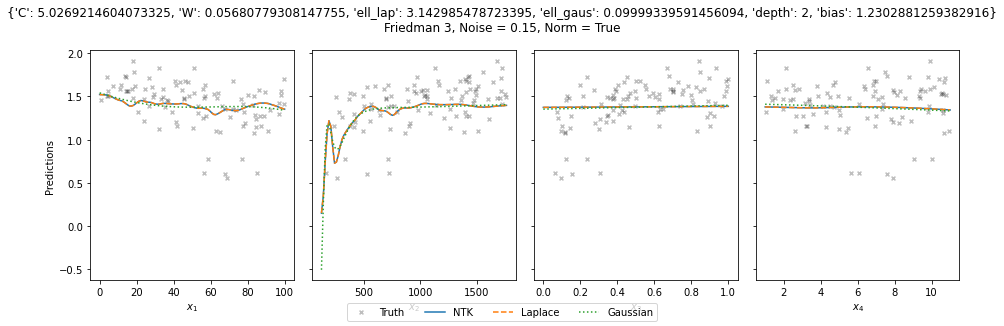

In [158]:
experiment_output = all_outputs['none']
pos=33
plotting_X = experiment_output[pos]['dataset']['draw']
mean_lap = experiment_output[pos]['means'][1]
mean_gaus = experiment_output[pos]['means'][2]
mean_ntk = experiment_output[pos]['means'][0]
ground = experiment_output[pos]['dataset']['test'][1]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(13,4.5), sharey=True)

const_val = ConstantKernel(constant_value=experiment_output[pos]['kernel']['C'], constant_value_bounds='fixed')

ntk = const_val * NTK(depth=experiment_output[pos]['kernel']['depth'], bias=experiment_output[pos]['kernel']['bias'], bias_bounds='fixed')
lap = const_val * Matern(nu=0.5, length_scale=experiment_output[pos]['kernel']['ell_lap'], length_scale_bounds='fixed')
gaus = const_val * Matern(nu=np.inf, length_scale=experiment_output[pos]['kernel']['ell_gaus'], length_scale_bounds='fixed')

if experiment_output[pos]['kernel']['W'] != None:
    white = WhiteKernel(noise_level=experiment_output[pos]['kernel']['W'], noise_level_bounds='fixed')
    ntk += white 
    lap += white
    gaus += white

gp_ntk = GPR(kernel=ntk, alpha=1e-5, normalize_y=False, n_restarts_optimizer=0, random_state=3480795)
gp_ntk.fit(datasets[pos//3][0], datasets[pos//3][1])
gp_lap = GPR(kernel=lap, alpha=1e-5, normalize_y=False, n_restarts_optimizer=0, random_state=3480795)
gp_lap.fit(datasets[pos//3][0], datasets[pos//3][1])
gp_gaus = GPR(kernel=gaus, alpha=1e-5, normalize_y=False, n_restarts_optimizer=0, random_state=3480795)
gp_gaus.fit(datasets[pos//3][0], datasets[pos//3][1])

print(datasets[pos//3][-1])

for i in range(0,4):
    axes[i].scatter(plotting_X[:,i], ground, s=15, marker='x', c='black', alpha=0.25)
    axes[i].plot(x[i], gp_ntk.predict(X_norm[i]), alpha=1)
    axes[i].plot(x[i], gp_lap.predict(X_norm[i]), alpha=1, ls='--')
    axes[i].plot(x[i], gp_gaus.predict(X_norm[i]), alpha=1, ls=':')
    # axes[i].scatter(plotting_X[:,i], mean_ntk, alpha=0.5)
    # axes[i].scatter(plotting_X[:,i], mean_gaus, alpha=0.5)
    axes[i].set_xlabel(rf'$x_{i+1}$')
axes[0].set_ylabel('Predictions')
fig.suptitle(f"{experiment_output[pos]['kernel']}\n{experiment_output[pos]['dataset']['name']}, Noise = {experiment_output[pos]['dataset']['noise']}, Norm = {experiment_output[pos]['dataset']['norm']}")
fig.legend(['Truth','NTK', 'Laplace', 'Gaussian'], loc='lower center', ncol=4)
fig.tight_layout()

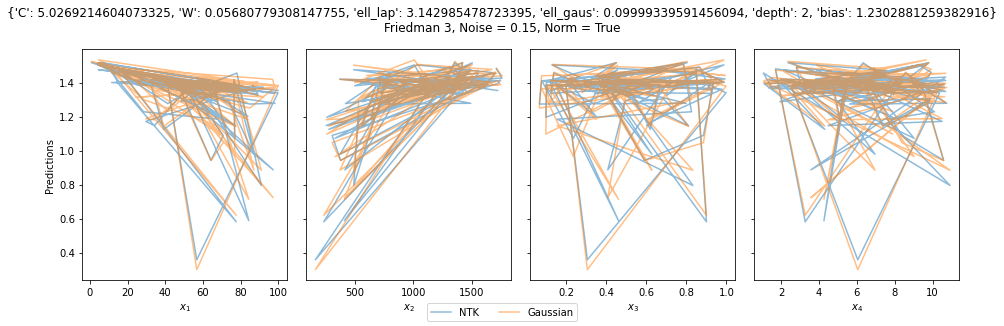

In [128]:
experiment_output = all_outputs['none']
pos=33
plotting_X = experiment_output[pos]['dataset']['draw']
mean_lap = experiment_output[pos]['means'][1]
mean_gaus = experiment_output[pos]['means'][2]
mean_ntk = experiment_output[pos]['means'][0]
ground = experiment_output[pos]['dataset']['test'][1]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(13,4.5), sharey=True)

for i in range(0,4):
    axes[i].plot(plotting_X[:,i], mean_ntk, alpha=0.5)
    axes[i].plot(plotting_X[:,i], mean_gaus, alpha=0.5)
    # axes[i].plot(plotting_X[:,i], ground, s=15, marker='x', c='black')
    axes[i].set_xlabel(rf'$x_{i+1}$')
axes[0].set_ylabel('Predictions')
fig.suptitle(f"{experiment_output[pos]['kernel']}\n{experiment_output[pos]['dataset']['name']}, Noise = {experiment_output[pos]['dataset']['noise']}, Norm = {experiment_output[pos]['dataset']['norm']}")
fig.legend(['NTK', 'Gaussian'], loc='lower center', ncol=2)
fig.tight_layout()

In [ ]:
pos = 4
plotting_X = experiment_output[pos]['dataset']['draw']
mean_lap = experiment_output[pos]['means'][1]
mean_ntk = experiment_output[pos]['means'][0]
ground = experiment_output[pos]['dataset']['test'][1]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(13,4.5), sharey=True)

for i in range(0,4):
    axes[i].scatter(plotting_X[:,i], mean_ntk, alpha=0.5)
    axes[i].scatter(plotting_X[:,i], mean_lap, alpha=0.5)
    axes[i].scatter(plotting_X[:,i], ground, s=15, marker='x', c='black')
    axes[i].set_xlabel(rf'$x_{i+1}$')
axes[0].set_ylabel('Predictions')
fig.suptitle(f"{experiment_output[pos]['kernel']}\n{experiment_output[pos]['dataset']['name']}, Noise = {experiment_output[pos]['dataset']['noise']}")
fig.legend(['NTK', 'Laplace'], loc='lower center', ncol=2)
fig.tight_layout()

In [ ]:
pos = 4
plotting_X = experiment_output_std[pos]['dataset']['draw']
mean_gaus = experiment_output_std[pos]['means'][2]
mean_ntk = experiment_output_std[pos]['means'][0]
ground = experiment_output_std[pos]['dataset']['test'][1]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(13,4.5), sharey=True)

for i in range(0,4):
    axes[i].scatter(plotting_X[:,i], mean_ntk)
    axes[i].scatter(plotting_X[:,i], mean_gaus)
    axes[i].set_xlabel(rf'$x_{i+1}$')
axes[0].set_ylabel('Predictions')
fig.suptitle(f"{experiment_output_std[pos]['kernel']}\n{experiment_output_std[pos]['dataset']['name']}, Noise = {experiment_output_std[pos]['dataset']['noise']}")
fig.legend(['NTK', 'Gaussian'], loc='lower center', ncol=2)
fig.tight_layout()

In [ ]:
pos = 4
plotting_X = experiment_output_std[pos]['dataset']['draw']
mean_lap = experiment_output_std[pos]['means'][1]
mean_ntk = experiment_output_std[pos]['means'][0]
ground = experiment_output_std[pos]['dataset']['test'][1]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(13,4.5), sharey=True)

for i in range(0,4):
    axes[i].scatter(plotting_X[:,i], mean_ntk)
    axes[i].scatter(plotting_X[:,i], mean_lap)
    axes[i].set_xlabel(rf'$x_{i+1}$')
axes[0].set_ylabel('Predictions')
fig.suptitle(f"{experiment_output_std[pos]['kernel']}\n{experiment_output_std[pos]['dataset']['name']}, Noise = {experiment_output_std[pos]['dataset']['noise']}")
fig.legend(['NTK', 'Laplace'], loc='lower center', ncol=2)
fig.tight_layout()

In [ ]:
pos = 4
plotting_X = experiment_output_std[pos]['dataset']['draw']
mean_gaus = experiment_output_std[pos]['means'][2]
mean_ntk = experiment_output_std[pos]['means'][0]
ground = experiment_output_std[pos]['dataset']['test'][1]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(13,4.5), sharey=True)

for i in range(0,4):
    axes[i].scatter(plotting_X[:,i], mean_ntk)
    axes[i].scatter(plotting_X[:,i], mean_gaus)
    axes[i].scatter(plotting_X[:,i], ground, s=15, marker='x')
    axes[i].set_xlabel(rf'$x_{i+1}$')
axes[0].set_ylabel('Predictions')
fig.suptitle(f"{experiment_output_std[pos]['kernel']}\n{experiment_output_std[pos]['dataset']['name']}, Noise = {experiment_output_std[pos]['dataset']['noise']}")
fig.legend(['NTK', 'Gaussian'], loc='lower center', ncol=2)
fig.tight_layout()

In [ ]:
pos = 4
plotting_X = experiment_output_std[pos]['dataset']['draw']
mean_lap = experiment_output_std[pos]['means'][1]
mean_ntk = experiment_output_std[pos]['means'][0]
ground = experiment_output_std[pos]['dataset']['test'][1]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(13,4.5), sharey=True)

for i in range(0,4):
    axes[i].scatter(plotting_X[:,i], mean_ntk)
    axes[i].scatter(plotting_X[:,i], mean_lap)
    axes[i].scatter(plotting_X[:,i], ground, s=15, marker='x')
    axes[i].set_xlabel(rf'$x_{i+1}$')
axes[0].set_ylabel('Predictions')
fig.suptitle(f"{experiment_output_std[pos]['kernel']}\n{experiment_output_std[pos]['dataset']['name']}, Noise = {experiment_output_std[1]['dataset']['noise']}")
fig.legend(['NTK', 'Laplace'], loc='lower center', ncol=2)
fig.tight_layout()

In [ ]:
pos = 0
experiment_output[pos]['dataset']['name'], experiment_output[pos]['kernel']

In [ ]:
pos = 0
plotting_X = experiment_output_std[pos]['dataset']['draw']
mean_gaus = experiment_output_std[pos]['means'][2]
mean_ntk = experiment_output_std[pos]['means'][0]
ground = experiment_output_std[pos]['dataset']['test'][1]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(13,4.5), sharey=True)

for i in range(0,4):
    axes[i].scatter(plotting_X[:,i], mean_ntk)
    axes[i].scatter(plotting_X[:,i], mean_gaus)
    axes[i].scatter(plotting_X[:,i], ground, s=15, marker='x')
    axes[i].set_xlabel(rf'$x_{i+1}$')
axes[0].set_ylabel('Predictions')
fig.suptitle(f"{experiment_output_std[pos]['kernel']}\n{experiment_output_std[pos]['dataset']['name']}, Noise = {experiment_output_std[1]['dataset']['noise']}")
fig.legend(['NTK', 'Gaussian'], loc='lower center', ncol=2)
fig.tight_layout()

In [ ]:
pos = 0
plotting_X = experiment_output_std[0]['dataset']['draw']
mean_lap = experiment_output_std[0]['means'][1]
mean_ntk = experiment_output_std[0]['means'][0]
ground = experiment_output_std[0]['dataset']['test'][1]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(13,4.5), sharey=True)

for i in range(0,4):
    axes[i].scatter(plotting_X[:,i], mean_ntk)
    axes[i].scatter(plotting_X[:,i], mean_lap)
    axes[i].scatter(plotting_X[:,i], ground, s=15, marker='x')
    axes[i].set_xlabel(rf'$x_{i+1}$')
axes[0].set_ylabel('Predictions')
fig.suptitle(f"{experiment_output_std[pos]['kernel']}\n{experiment_output_std[pos]['dataset']['name']}, Noise = {experiment_output_std[1]['dataset']['noise']}")
fig.legend(['NTK', 'Laplace'], loc='lower center', ncol=2)
fig.tight_layout()